Find the plane of symmetry between the two halves of the wind
and derive a coordinate system 
which we can then plot to see how symetric the wings are


In [9]:
import pandas

f = "hg1a1b.txt"
k = pandas.read_csv(f, sep=" ", names=["x","y","z","r","g","b","nx","ny","nz"])
len(k)


9653216

Enter lower down once we have got the best plane of reflection

297.97945681346789

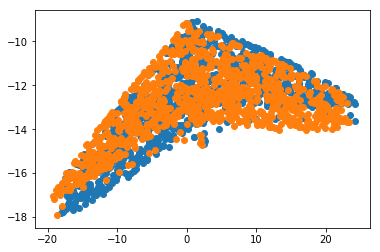

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

import random, numpy, math

#   subselect...
b = k.iloc[random.sample(range(len(k)), 1000)]
plt.scatter(b.x, b.z)

# approx reflect plane
mv = pandas.Series({"x":3, "y":-0.4, "z":0.3})

# too slow: bmirr = b.apply(lambda R:R[["x","y","z"]] - mv*(2*(R.x*mv.x+R.y*mv.y+R.z*mv.z)/mvsq), axis=1)
mvfac = (b.x*mv.x + b.y*mv.y + b.z*mv.z)*2/sum(mv**2) 
bmirr = pandas.DataFrame({"x":b.x-mv.x*mvfac, "y":b.y-mv.y*mvfac, "z":b.z-mv.z*mvfac})

plt.scatter(bmirr.x, bmirr.z)

sum(bmirr.apply(lambda p:min((b.x-p.x)**2+(b.y-p.y)**2+(b.z-p.z)**2), axis=1))

11965.8256364 [3, -0.4, -0.20000000000000001]
8028.15920392 [3, -0.4, -0.10000000000000003]
4887.31848284 [3, -0.4, 0.0]
2703.44829456 [3, -0.4, 0.10000000000000003]
1556.94828816 [3, -0.4, 0.20000000000000001]
1555.26112163 [3, -0.4, 0.29999999999999999]
2762.3314606 [3, -0.4, 0.40000000000000008]
5290.24676263 [3, -0.4, 0.5]
9292.9236845 [3, -0.4, 0.60000000000000009]
14755.6474974 [3, -0.4, 0.69999999999999996]
21675.0303646 [3, -0.4, 0.80000000000000004]


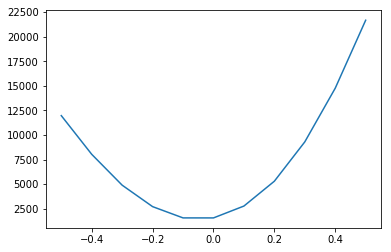

In [63]:
# find sum aggregate of closest approaches for all the points
def fun(X):
    mv = pandas.Series({"x":X[0], "y":X[1], "z":X[2]})
    mvfac = (b.x*mv.x + b.y*mv.y + b.z*mv.z)*2/sum(mv**2) - 2
    bmirr = pandas.DataFrame({"x":b.x-mv.x*mvfac, "y":b.y-mv.y*mvfac, "z":b.z-mv.z*mvfac})
    res = sum(bmirr.apply(lambda p:min((b.x-p.x)**2+(b.y-p.y)**2+(b.z-p.z)**2), axis=1))
    print(res, X)
    return res

X0 = [3,-0.4,0.3]
ys = numpy.linspace(-0.5,0.5,11)
rs = [fun([X0[0],X0[1],X0[2]+y])  for y in ys]
plt.plot(ys, rs)

In [64]:
# now do general minimizing
from scipy.optimize import minimize
d = minimize(fun, X0)
d

1555.26112163 [ 3.  -0.4  0.3]
1555.26111725 [ 3.00000001 -0.4         0.3       ]
1555.26100039 [ 3.         -0.39999999  0.3       ]
1555.26121168 [ 3.         -0.4         0.30000001]
1555.26112163 [ 3.  -0.4  0.3]
23349.5917657 [ 3.02926584  0.41047985 -0.30196837]
23349.5917657 [ 3.02926584  0.41047985 -0.30196837]
23349.5915786 [ 3.02926585  0.41047985 -0.30196837]
23349.5922334 [ 3.02926584  0.41047987 -0.30196837]
23349.5910511 [ 3.02926584  0.41047985 -0.30196835]
774.047981988 [ 3.00468395 -0.27028414  0.20365604]
774.047981988 [ 3.00468395 -0.27028414  0.20365604]
774.047987842 [ 3.00468396 -0.27028414  0.20365604]
774.047930596 [ 3.00468395 -0.27028413  0.20365604]
774.047925571 [ 3.00468395 -0.27028414  0.20365605]
2444.10999009 [ 2.98581077  0.02957974  0.34533969]
2444.10999009 [ 2.98581077  0.02957974  0.34533969]
2444.10996999 [ 2.98581079  0.02957974  0.34533969]
2444.11014871 [ 2.98581077  0.02957975  0.34533969]
2444.11022411 [ 2.98581077  0.02957974  0.3453397 ]
56

219.774094593 [ 0.83927931 -0.08920529  0.08820971]
219.774094593 [ 0.83927931 -0.08920529  0.08820971]
219.774094565 [ 0.83927933 -0.08920529  0.08820971]
219.774094688 [ 0.83927931 -0.08920527  0.08820971]
219.774095298 [ 0.83927931 -0.08920529  0.08820972]
219.773334893 [ 0.83893301 -0.08918016  0.08816572]
219.773334893 [ 0.83893301 -0.08918016  0.08816572]
219.773334892 [ 0.83893302 -0.08918016  0.08816572]
219.773334897 [ 0.83893301 -0.08918014  0.08816572]
219.77333492 [ 0.83893301 -0.08918016  0.08816574]
219.773334244 [ 0.83891289 -0.08917854  0.0881635 ]
219.773334244 [ 0.83891289 -0.08917854  0.0881635 ]
219.773334245 [ 0.83891291 -0.08917854  0.0881635 ]
219.773334246 [ 0.83891289 -0.08917853  0.0881635 ]
219.773334232 [ 0.83891289 -0.08917854  0.08816351]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892015 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917924  0.08816424]
219.773334046

219.773334046 [ 0.83892013 -0.08917924  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816425]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892014 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917924  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816425]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892014 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917924  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816425]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892014 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917924  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816425]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.773334046 [ 0.83892013 -0.08917926  0.08816424]
219.77333404

      fun: 219.7733340463635
 hess_inv: array([[  1.93417104e-05,   2.05864795e-06,   2.97800814e-06],
       [  2.05864795e-06,   3.84794019e-07,   1.51771766e-07],
       [  2.97800814e-06,   1.51771766e-07,   6.50856461e-07]])
      jac: array([  1.52587891e-05,   8.58306885e-05,   2.86102295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 432
      nit: 26
     njev: 84
   status: 2
  success: False
        x: array([ 0.83892013, -0.08917926,  0.08816424])

Enter here now that we have the best plane of reflection

x    0.838920
y   -0.089179
z    0.088164
dtype: float64

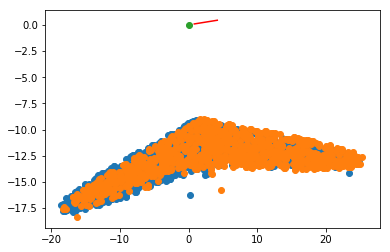

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import random, numpy, math
b = k.iloc[random.sample(range(len(k)), 1000)]

mv = pandas.Series({"x":2.14633095, "y":-0.270342094, "z":0.24707184})
mv = pandas.Series({"x":0.83892013, "y":-0.08917926, "z":0.08816424})
#mv = pandas.Series({"x":2, "y":0, "z":0})

mvfac = (b.x*mv.x + b.y*mv.y + b.z*mv.z)*2/sum(mv**2) - 2
bmirr = pandas.DataFrame({"x":b.x-mv.x*mvfac, "y":b.y-mv.y*mvfac, "z":b.z-mv.z*mvfac})
plt.scatter(b.x, b.z)
plt.scatter(bmirr.x, bmirr.z)
plt.scatter([0], [0])
plt.plot([mv.x, mv.x*5],[mv.z, 5*mv.z], color="r")
mv

Now convert to new coordinate system

In [3]:
k = k.iloc[::1000]

0.848241037764704

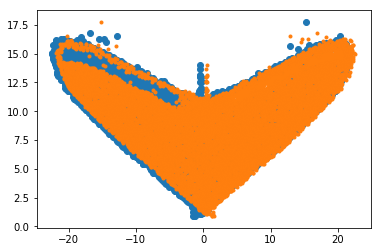

In [31]:
import math, numpy


mv = pandas.Series({"x":0.83892013, "y":-0.08917926, "z":0.08816424})
mvsq = sum(mv**2)
mv1 = mv/math.sqrt(mvsq)
mv2p = pandas.Series(numpy.cross(mv, [16,1,0]), index=["x", "y", "z"])
mv2 = mv2p/math.sqrt(sum(mv2p**2))
mv3 = pandas.Series(numpy.cross(mv1, mv2), index=["x", "y", "z"])
mv2, mv3 = -mv3, mv2

k1 = pandas.DataFrame({"x":k.x-mv.x, "y":k.y-mv.y, "z":k.z-mv.z})
def kd(k1, mv1):  
    return k1.x*mv1.x + k1.y*mv1.y + k1.z*mv1.z
k2 = pandas.DataFrame({"x":kd(k1,mv1), "y":kd(k1,mv2), "z":kd(k1,mv3)})

plt.scatter(k2.iloc[::1000].x, k2.iloc[::1000].y)
plt.scatter(-k2.iloc[::1000].x, k2.iloc[::1000].y, marker=".")
math.sqrt(mvsq)

0.848241037764704

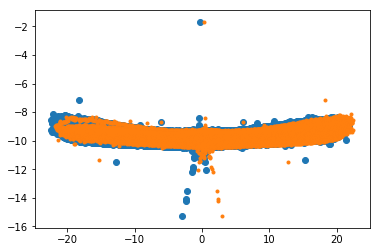

In [32]:
plt.scatter(k2.iloc[::1000].x, k2.iloc[::1000].z)
plt.scatter(-k2.iloc[::1000].x, k2.iloc[::1000].z, marker=".")
math.sqrt(mvsq)

In [33]:
xrange = min(k2.x), max(k2.x)
yrange = min(k2.y), max(k2.y)
zrange = min(k2.z), max(k2.z)

xrect = [yrange[0],yrange[1],yrange[1],yrange[0],yrange[0]]
yrect = [zrange[0],zrange[0],zrange[1],zrange[1],zrange[0]]


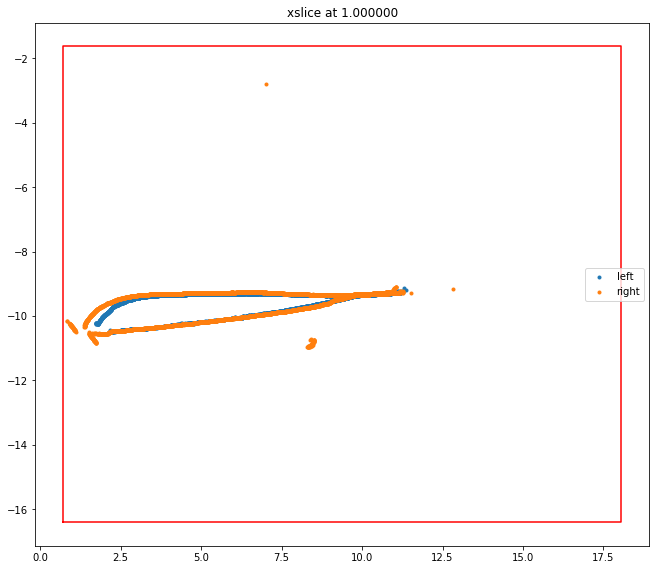

In [47]:
x = 1
dx=0.01
plt.figure(figsize=(11,11))
plt.gca().set_aspect("equal")
plt.plot(xrect,yrect,color="r")
s = k2[(k2.x>x) & (k2.x<x+dx)]
plt.scatter(s.y,s.z,marker=".", label="left")
sm = k2[(-k2.x>x) & (-k2.x<x+dx)]
plt.scatter(sm.y,sm.z,marker=".", label="right")
plt.title("xslice at %f" % x)
plt.legend()


In [50]:
for i, x in enumerate(numpy.arange(-20,20,0.1)):
    print(x)
    plt.figure(figsize=(11,11), frameon=False)
    plt.gca().set_aspect("equal")
    dx=0.01
    b = k2[(k2.x>x) & (k2.x<x+dx)]
    plt.plot(xrect,yrect,color="r")
    plt.scatter(b.y,b.z,marker=".", label="left")
    sm = k2[(-k2.x>x) & (-k2.x<x+dx)]
    plt.scatter(sm.y,sm.z,marker=".", label="right")
    plt.title("xslice %f" % x)
    plt.legend()
    plt.savefig("imgs/slc_%d.png" % i, format='png', pad_inches=0.0, bbox_inches='tight')
    plt.close()
# ffmpeg -start_number 0 -i imgs/slc_%d.png -vcodec mpeg4 U2melt2.avi


-20.0
-19.9
-19.8
-19.7
-19.6
-19.5
-19.4
-19.3
-19.2
-19.1
-19.0
-18.9
-18.8
-18.7
-18.6
-18.5
-18.4
-18.3
-18.2
-18.1
-18.0
-17.9
-17.8
-17.7
-17.6
-17.5
-17.4
-17.3
-17.2
-17.1
-17.0
-16.9
-16.8
-16.7
-16.6
-16.5
-16.4
-16.3
-16.2
-16.1
-16.0
-15.9
-15.8
-15.7
-15.6
-15.5
-15.4
-15.3
-15.2
-15.1
-15.0
-14.9
-14.8
-14.7
-14.6
-14.5
-14.4
-14.3
-14.2
-14.1
-14.0
-13.9
-13.8
-13.7
-13.6
-13.5
-13.4
-13.3
-13.2
-13.1
-13.0
-12.9
-12.8
-12.7
-12.6
-12.5
-12.4
-12.3
-12.2
-12.1
-12.0
-11.9
-11.8
-11.7
-11.6
-11.5
-11.4
-11.3
-11.2
-11.1
-11.0
-10.9
-10.8
-10.7
-10.6
-10.5
-10.4
-10.3
-10.2
-10.1
-10.0
-9.9
-9.8
-9.7
-9.6
-9.5
-9.4
-9.3
-9.2
-9.1
-9.0
-8.9
-8.8
-8.7
-8.6
-8.5
-8.4
-8.3
-8.2
-8.1
-8.0
-7.9
-7.8
-7.7
-7.6
-7.5
-7.4
-7.3
-7.2
-7.1
-7.0
-6.9
-6.8
-6.7
-6.6
-6.5
-6.4
-6.3
-6.2
-6.1
-6.0
-5.9
-5.8
-5.7
-5.6
-5.5
-5.4
-5.3
-5.2
-5.1
-5.0
-4.9
-4.8
-4.7
-4.6
-4.5
-4.4
-4.3
-4.2
-4.1
-4.0
-3.9
-3.8
-3.7
-3.6
-3.5
-3.4
-3.3
-3.2
-3.1
-3.0
-2.9
-2.8
-2.7
-2.6
-2.5
-2.4
-2.3
-2.2
-2.1

In [49]:
print(i)

79
